# Exercise sample: images
Change this sample according to your needs. Run all the cells, and upload resulting `.xml` file to Moodle.

## Auxilary functions

In [1]:
%pylab inline
from moodle import *
num_q(-1.2,0.001), multi_q([("12",50),("23",50),("34",-100)])

Populating the interactive namespace from numpy and matplotlib


('{1:NUMERICAL:=-1.200000:0.001000#Pravilno~-1.200000:0.010000#Premalo pravilnih decimalk}',
 '{1:MULTICHOICE:~%50.000000%12\n~%50.000000%23\n~%-100.000000%34\n}')

## Question parameters
Generate parameters, that appear in the questions.

In [2]:
from scipy.interpolate import interp1d

x0 = sort(hstack((array([0,1]),rand(2)/2+0.25)))
y0 = sort(hstack((array([0,1]),rand(2)*abs(x0[1]-x0[2])/2+transpose(x0[1:2]))))
sp = interp1d(x0,y0,kind='cubic')
f  = lambda x: cos(pi/2*x)
functions = [(lambda x: (1-x)**1.5,0,1), (lambda x: (1+x)**0.7,-1,0),  (lambda x: cos(pi/2*x),4,5)]
random_points = lambda a,b: [randint(1,9)/10*(b-a) + a for i in range(3)] # 3 random points in [a,b]
parameters  = [fun + tuple(random_points(fun[1],fun[2])) for fun in functions]
parameters

[(<function __main__.<lambda>>, 0, 1, 0.3, 0.8, 0.2),
 (<function __main__.<lambda>>, -1, 0, -0.6, -0.5, -0.4),
 (<function __main__.<lambda>>, 4, 5, 4.3, 4.2, 4.6)]

## Question body
Write the function, that generates the text of the question. You can use the following syntax to add different inputs to 
question string `q`:
  
  * value of a variable: `q = q + str(x)`
  * Python expressions: `q = q + str(1+2*x)`
  * answer input field: `q = q + num_q(correct_answer, precision)`  
  
###  Note on embedding images
Images can be embeded in question text in the form of BASE64 encoded string via `<img src="data:image/base64,..."/>` tag. To save [matplotlib](http://www.matplotlib.org) image as an encoded string, one has to use `io.BytesIO` virtual bytes stream.

In [3]:
import io
import base64

def question_text(parameter):
    fun, a, b, x0, y0, xi =  parameter # parameter contains function, interval boundaries
    clf() # clear the plot
    t = linspace(0,1)*(b-a) + a
    y = fun(t)
    plot(t,y)
    grid()
    xticks(arange(a,b,0.1))
    yticks(arange(0,1,0.1))
    xlim(a,b)
    ylim(min(y),max(y))
    strio = io.BytesIO() # plot figure into a string
    savefig(strio,format="png")
    val = strio.getvalue() # get image string and decode it with base64 
    img = base64.b64encode(val).decode() 
    strio.close()
    q = """<p>Below is a graph of an unknown function f</p>
    <img src="data:image/png;base64,%s" />
    <p>What are approximate values of the following numbers (round it on 1 decimal place):</p>
    <ul>
    <li>f(%0.2f) %s </li>
    <li>x, such that f(x)=%0.2f %s</li>
    <li>\\(f^{-1}(%0.2f)\\) %s </li>
    </ul>""" % (img,x0,num_q(fun(x0),0.05),fun(y0),num_q(y0,0.05),fun(xi),num_q(xi,0.05))
    return q


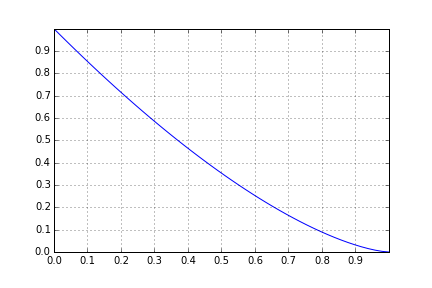

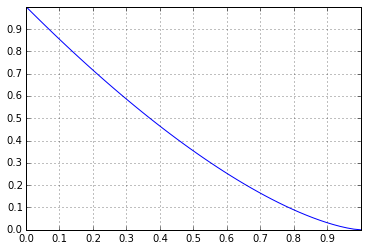

In [4]:
# display the first question
from IPython.display import HTML
HTML(question_text(parameters[0]))

## Write to file

Questions were saved in read_from_graph.xml, that can be imported into Moodle


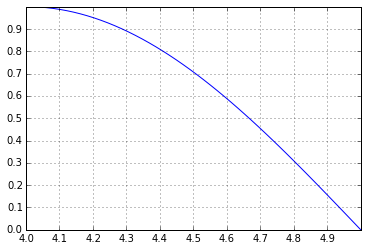

In [5]:
# Write the questions to a file
name = "read_from_graph"
category  = 'functions/graph/'
questions = []
for param in parameters:
    b = question_text(param)
    questions.append(b)
file = open(name + ".xml","w",encoding="utf8")
# Write to Moodle xml file
moodle_xml(name,questions, cloze_question, category = category, iostream = file)
file.close()
print("Questions were saved in " + name + ".xml, that can be imported into Moodle")